### Part A

In [18]:
# HERE YOU WILL WRITE CODE TO TEST A NUMBER OF PREDICTORS
# AND FINALLY CHOOSE AND TRAIN THE PREDICTOR THAT YOU WILL BE USING FOR PART B
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from sklearn import linear_model
from sklearn.preprocessing import MinMaxScaler

In [2]:
#Importing the data set in data frame
df = pd.read_csv('CE802_P3_Data.csv')
df.head()


,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F28,F29,F30,F31,F32,F33,F34,F35,F36,Target
0,391.54,-1187.91,454.14,UK,110.23,-185.90,74.82,-349.54,54.43,220.20,...,-98.61,20792.14,2349.78,-728.52,2.48,6.26,5,-2558.91,Very low,314.17
1,-5972.94,3087.03,666.78,Europe,198.78,-301.16,66.93,-371.60,-374.36,116.34,...,-78.75,27071.96,959.86,518.34,3.24,6.24,3,-2210.10,Very low,-1410.42
2,3457.75,255.15,350.10,UK,178.73,-80.16,85.47,-308.88,-225.05,259.08,...,36.15,18956.84,1027.46,-272.04,2.40,-7.60,4,-1967.13,Low,609.09
3,5816.09,3185.46,467.10,USA,186.79,-240.90,74.52,-387.02,-53.64,351.42,...,-47.10,18581.22,2013.38,-2481.69,4.70,8.28,3,-877.20,High,2005.25
4,8521.42,811.47,407.82,Rest,160.67,-148.62,69.15,-365.68,-583.60,297.12,...,-77.55,12522.72,1346.02,-1811.85,1.92,-3.32,6,-1054.29,Medium,1840.37


In [4]:
#Checking the dimension of data set
df.shape

(1500, 37)

In [5]:
#Checking for null values in dataset
df.isnull().sum()

F1        0
F2        0
F3        0
F4        0
F5        0
F6        0
F7        0
F8        0
F9        0
F10       0
F11       0
F12       0
F13       0
F14       0
F15       0
F16       0
F17       0
F18       0
F19       0
F20       0
F21       0
F22       0
F23       0
F24       0
F25       0
F26       0
F27       0
F28       0
F29       0
F30       0
F31       0
F32       0
F33       0
F34       0
F35       0
F36       0
Target    0
dtype: int64

In [6]:
#Information of dataset with data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 37 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   F1      1500 non-null   float64
 1   F2      1500 non-null   float64
 2   F3      1500 non-null   float64
 3   F4      1500 non-null   object 
 4   F5      1500 non-null   float64
 5   F6      1500 non-null   float64
 6   F7      1500 non-null   float64
 7   F8      1500 non-null   float64
 8   F9      1500 non-null   float64
 9   F10     1500 non-null   float64
 10  F11     1500 non-null   float64
 11  F12     1500 non-null   float64
 12  F13     1500 non-null   float64
 13  F14     1500 non-null   float64
 14  F15     1500 non-null   float64
 15  F16     1500 non-null   float64
 16  F17     1500 non-null   float64
 17  F18     1500 non-null   float64
 18  F19     1500 non-null   int64  
 19  F20     1500 non-null   float64
 20  F21     1500 non-null   float64
 21  F22     1500 non-null   float64
 22  

In [7]:
#Convert categorical attribute into numerical and change data type
df['F4'] = pd.factorize(df.F4)[0]
df['F4'] = df.F4.astype('float64')
#  UK=0.0 ,Europe=1.0, USA =2.0, Rest=3.0

In [8]:
#Change data types of columns from int to float
df['F19'] = df.F19.astype('float64')
df['F34'] = df.F34.astype('float64')

In [9]:
#Convert categorical attribute into numerical and change data type
df['F36'] = pd.factorize(df.F36)[0]
df['F36'] = df.F36.astype('float64')
# very low=0.0 , low=1.0, high=2.0 , medium=3.0, very high= 4.0

In [10]:
#recheck the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 37 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   F1      1500 non-null   float64
 1   F2      1500 non-null   float64
 2   F3      1500 non-null   float64
 3   F4      1500 non-null   float64
 4   F5      1500 non-null   float64
 5   F6      1500 non-null   float64
 6   F7      1500 non-null   float64
 7   F8      1500 non-null   float64
 8   F9      1500 non-null   float64
 9   F10     1500 non-null   float64
 10  F11     1500 non-null   float64
 11  F12     1500 non-null   float64
 12  F13     1500 non-null   float64
 13  F14     1500 non-null   float64
 14  F15     1500 non-null   float64
 15  F16     1500 non-null   float64
 16  F17     1500 non-null   float64
 17  F18     1500 non-null   float64
 18  F19     1500 non-null   float64
 19  F20     1500 non-null   float64
 20  F21     1500 non-null   float64
 21  F22     1500 non-null   float64
 22  

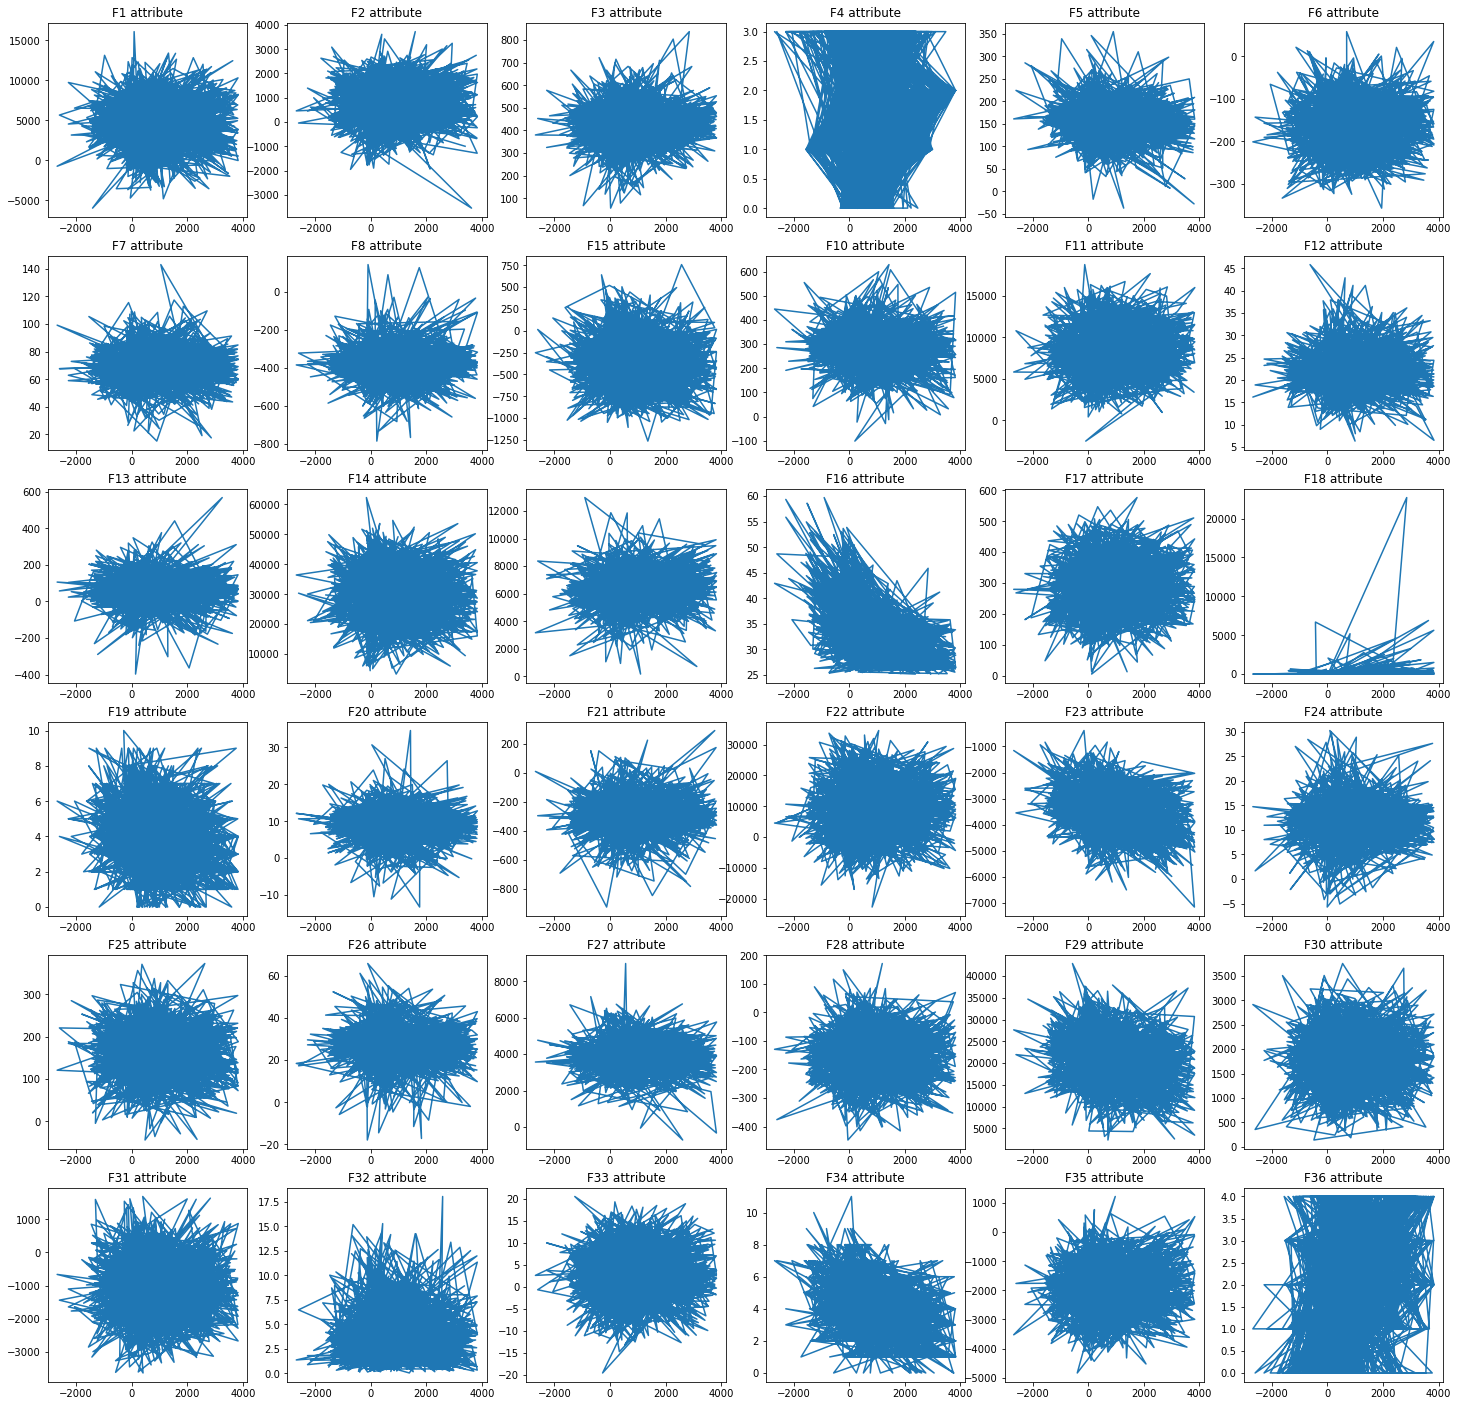

In [11]:
#Relation of features with Target using subplots
x=df['Target']
y1=df['F1']
y2=df['F2']
y3=df['F3']
y4=df['F4']
y5=df['F5']
y6=df['F6']
y7=df['F7']
y8=df['F8']
y9=df['F9']
y10=df['F10']
y11=df['F11']
y12=df['F12']
y13=df['F13']
y14=df['F14']
y15=df['F15']
y16=df['F16']
y17=df['F17']
y18=df['F18']
y19=df['F19']
y20=df['F20']
y21=df['F21']
y22=df['F22']
y23=df['F23']
y24=df['F24']
y25=df['F25']
y26=df['F26']
y27=df['F27']
y28=df['F28']
y29=df['F29']
y30=df['F30']
y31=df['F31']
y32=df['F32']
y33=df['F33']
y34=df['F34']
y35=df['F35']
y36=df['F36']
figure, axis = plt.subplots(6, 6,figsize=(25,25))
# For F1 attribute
axis[0, 0].plot(x, y1)
axis[0, 0].set_title("F1 attribute")
# For F2 attribute
axis[0, 1].plot(x, y2)
axis[0, 1].set_title("F2 attribute")
# For F3 attribute
axis[0, 2].plot(x, y3)
axis[0, 2].set_title("F3 attribute")
# For F4 attribute
axis[0, 3].plot(x, y4)
axis[0, 3].set_title("F4 attribute")
# For F5 attribute
axis[0, 4].plot(x, y5)
axis[0, 4].set_title("F5 attribute")
# For F6 attribute
axis[0, 5].plot(x, y6)
axis[0, 5].set_title("F6 attribute")
# For F7 attribute
axis[1, 0].plot(x, y7)
axis[1, 0].set_title("F7 attribute")
# For F8 attribute
axis[1, 1].plot(x, y8)
axis[1, 1].set_title("F8 attribute")
# For F9 attribute
axis[1, 2].plot(x, y9)
axis[1, 2].set_title("F9 attribute")
# For F10 attribute
axis[1, 3].plot(x, y10)
axis[1, 3].set_title("F10 attribute")
# For F11 attribute
axis[1, 4].plot(x, y11)
axis[1, 4].set_title("F11 attribute")
# For F12 attribute
axis[1, 5].plot(x, y12)
axis[1, 5].set_title("F12 attribute")
# For F13 attribute
axis[2, 0].plot(x, y13)
axis[2, 0].set_title("F13 attribute")
# For F14 attribute
axis[2, 1].plot(x, y14)
axis[2, 1].set_title("F14 attribute")
# For F15 attribute
axis[2, 2].plot(x, y15)
axis[1, 2].set_title("F15 attribute")
# For F16 attribute
axis[2, 3].plot(x, y16)
axis[2, 3].set_title("F16 attribute")
# For F17 attribute
axis[2, 4].plot(x, y17)
axis[2, 4].set_title("F17 attribute")
# For F18 attribute
axis[2, 5].plot(x, y18)
axis[2, 5].set_title("F18 attribute")
# For F19 attribute
axis[3, 0].plot(x, y19)
axis[3, 0].set_title("F19 attribute")
# For F20 attribute
axis[3, 1].plot(x, y20)
axis[3, 1].set_title("F20 attribute")
# For F21 attribute
axis[3, 2].plot(x, y21)
axis[3, 2].set_title("F21 attribute")
# For F22 attribute
axis[3, 3].plot(x, y22)
axis[3, 3].set_title("F22 attribute")
# For F23 attribute
axis[3, 4].plot(x, y23)
axis[3, 4].set_title("F23 attribute")
# For F24 attribute
axis[3, 5].plot(x, y24)
axis[3, 5].set_title("F24 attribute")
# For F25 attribute
axis[4, 0].plot(x, y25)
axis[4, 0].set_title("F25 attribute")
# For F26 attribute
axis[4, 1].plot(x, y26)
axis[4, 1].set_title("F26 attribute")
# For F27 attribute
axis[4, 2].plot(x, y27)
axis[4, 2].set_title("F27 attribute")
# For F28 attribute
axis[4, 3].plot(x, y28)
axis[4, 3].set_title("F28 attribute")
# For F29 attribute
axis[4, 4].plot(x, y29)
axis[4, 4].set_title("F29 attribute")
# For F30 attribute
axis[4, 5].plot(x, y30)
axis[4, 5].set_title("F30 attribute")
# For F31 attribute
axis[5, 0].plot(x, y31)
axis[5, 0].set_title("F31 attribute")
# For F32 attribute
axis[5, 1].plot(x, y32)
axis[5, 1].set_title("F32 attribute")
# For F33 attribute
axis[5, 2].plot(x, y33)
axis[5, 2].set_title("F33 attribute")
# For F34 attribute
axis[5, 3].plot(x, y34)
axis[5, 3].set_title("F34 attribute")
# For F35 attribute
axis[5, 4].plot(x, y35)
axis[5, 4].set_title("F35 attribute")
# For F36 attribute
axis[5, 5].plot(x, y36)
axis[5, 5].set_title("F36 attribute")

plt.show()



In [12]:
#Diving feature and target attributes
features=df.drop(['Target'],axis=1)
target=df['Target']


# Linear Regression Model

In [13]:
#Splitting the data in training and testing set
x_train,x_test,y_train,y_test=train_test_split(features,target,test_size=0.20,random_state=1)#80 % training and 20 % testing

In [14]:
#Defining object of model and training model
lreg=linear_model.LinearRegression()
lreg.fit(x_train,y_train)

LinearRegression()

In [15]:
#predicting using x_test
y_predict=lreg.predict(x_test)


In [20]:
#Checking efficiency of model
print("Coefficients: \n", lreg.coef_)
print("Mean squared error is :",mean_squared_error(y_test,y_predict))
print("Root Mean squared error is :",math.sqrt(mean_squared_error(y_test,y_predict)))
print("Coefficient of Determination is :",r2_score(y_test,y_predict))


Coefficients: 
 [-4.72007491e-03  1.12681510e-02  2.01377072e-01  1.35039164e+02
 -5.39004017e-01 -1.97938197e-02 -3.35376837e-01  1.91900054e-01
 -2.93406205e-01  2.80632654e-02 -6.52814449e-03  8.64493854e+00
  1.67197592e-01  1.42704338e-03  2.27686962e-02 -1.02175365e+02
  1.85474399e-01  1.33916775e-01 -9.68540747e+01  3.22417736e+00
  2.93477694e-01 -8.27736628e-04 -4.47398654e-01 -2.11100963e+00
 -9.11380098e-01 -2.57461831e-01  2.57169781e-04 -8.52689418e-02
 -4.83565630e-02  7.07797298e-04  2.79464164e-02 -1.89514192e+01
 -1.54455220e+00 -2.47120103e+02  5.96255453e-02  2.39454605e+02]
Mean squared error is : 631030.8349408035
Root Mean squared error is : 794.3744928815397
Coefficient of Determination is : 0.570036171813382


# Lasso Regression Model

In [32]:
from sklearn.linear_model import Lasso
#Splitting the data in training and testing set
xl_train,xl_test,yl_train,yl_test=train_test_split(features,target,test_size=0.20,random_state=1)#80 % training and 20 % testing

In [33]:
#Defining object of model and training model
lr=Lasso(alpha=1.0,fit_intercept=True,normalize='deprecated')
lr.fit(xl_train,yl_train)

Lasso(normalize='deprecated')

In [34]:
#predicting using x_test
yl_predict=lr.predict(xl_test)

In [35]:
#Checking efficiency of model
print("Coefficients: \n", lr.coef_)
print("Mean squared error is :",mean_squared_error(yl_test,yl_predict))
print("Root Mean squared error is :",math.sqrt(mean_squared_error(yl_test,yl_predict)))
print("Coefficient of Determination is :",r2_score(yl_test,yl_predict))

Coefficients: 
 [-0.00000000e+00  0.00000000e+00  0.00000000e+00  1.03539770e+02
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -1.91114199e-01 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  1.97648186e-03 -9.68799186e+01
  0.00000000e+00  1.01824687e-01 -7.47143682e+01  0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -4.01135323e-01 -0.00000000e+00
 -3.28924474e-01 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -4.20160989e-02  0.00000000e+00  0.00000000e+00 -2.75567436e+00
 -0.00000000e+00 -2.25153914e+02  2.86112985e-02  2.16609901e+02]
Mean squared error is : 620420.2815684639
Root Mean squared error is : 787.6676212517967
Coefficient of Determination is : 0.5772658567899924


# Random Forest Regressor

In [36]:
from sklearn.ensemble import RandomForestRegressor
#Splitting the data in training and testing set
xr_train,xr_test,yr_train,yr_test=train_test_split(features,target,test_size=0.20,random_state=1)#80 % training and 20 % testing



In [37]:
#Defining object of model and training model
rfr = RandomForestRegressor(max_depth=3)
rfr.fit(xr_train,yr_train)

RandomForestRegressor(max_depth=3)

In [38]:
#predicting using x_test
yr_predict=rfr.predict(xr_test)

In [39]:
#Checking efficiency of model
print("Mean squared error is :",mean_squared_error(yr_test,yr_predict))
print("Root Mean squared error is :",math.sqrt(mean_squared_error(yr_test,yr_predict)))
print("Coefficient of Determination is :",r2_score(yr_test,yr_predict))

Mean squared error is : 872391.4608762723
Root Mean squared error is : 934.0189831455634
Coefficient of Determination is : 0.4055809139170421


# Ridge Regression

In [40]:
from sklearn.linear_model import Ridge
#Splitting the data in training and testing set
xri_train,xri_test,yri_train,yri_test=train_test_split(features,target,test_size=0.20,random_state=1)#80 % training and 20 % testing



In [41]:
#Defining object of model and training model
rir = Ridge(alpha=1.0)
rir.fit(xri_train,yri_train)

Ridge()

In [42]:
#predicting using x_test
yri_predict=rir.predict(xri_test)

In [43]:
#Checking efficiency of model
print("Coefficients: \n", rir.coef_)
print("Mean squared error is :",mean_squared_error(yri_test,yri_predict))
print("Root Mean squared error is :",math.sqrt(mean_squared_error(yri_test,yri_predict)))
print("Coefficient of Determination is :",r2_score(yri_test,yri_predict))

Coefficients: 
 [-4.72121381e-03  1.12572951e-02  2.01482944e-01  1.34939784e+02
 -5.39346213e-01 -1.97347416e-02 -3.35546513e-01  1.91838731e-01
 -2.93416078e-01  2.80287298e-02 -6.52709146e-03  8.64483986e+00
  1.67314823e-01  1.42692834e-03  2.27770850e-02 -1.02173368e+02
  1.85579284e-01  1.33931941e-01 -9.68244496e+01  3.22615434e+00
  2.93467872e-01 -8.28525665e-04 -4.47386271e-01 -2.10571660e+00
 -9.11341365e-01 -2.58492854e-01  2.42926253e-04 -8.52865799e-02
 -4.83555176e-02  6.92838464e-04  2.79379172e-02 -1.89454830e+01
 -1.54373450e+00 -2.47046334e+02  5.96266342e-02  2.39347238e+02]
Mean squared error is : 631021.3923646444
Root Mean squared error is : 794.3685494558835
Coefficient of Determination is : 0.5700426056767821


In [44]:
#Use of OLS regression on input and target attributes
import statsmodels.api as sm
X = sm.add_constant(features)
results = sm.OLS(target,X).fit()
results.summary()  

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.600
Method:                 Least Squares   F-statistic:                     63.46
Date:                Tue, 18 Jan 2022   Prob (F-statistic):          5.77e-269
Time:                        21:49:46   Log-Likelihood:                -12086.
No. Observations:                1500   AIC:                         2.425e+04
Df Residuals:                    1463   BIC:                         2.444e+04
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4526.3526    373.603     12.115      0.000    3793.497    5259.208
F1            -0.0045      0.007     -0.667      0.505      -0.018       0.009
F2             0.0186      0.023      0.793      0.428      -0.027       0.064
F3             0.1430      0.236      0.607      0.544      -0.319       0.605
F4           141.1903     18.322      7.706      0.000     105.251     177.130
F5            -0.5979      0.493     -1.212      0.226      -1.566       0.370
F6            -0.0674      0.333     -0.202      0.840      -0.722       0.587
F7            -0.4988      1.620     -0.308      0.758      -3.677       2.679
F8             0.0976      0.228      0.429      0.668      -0.349       0.544
F9            -0.2345      0.069     -3.422      0.001      -0.369      -0.100
F10           -0.0933      0.248     -0.377      0.706      -0.579       0.392
F11           -0.0049      0.007     -0.716      0.474      -0.018       0.009
F12            3.4196      4.667      0.733      0.464      -5.736      12.575
F13            0.0904      0.240      0.377      0.706      -0.380       0.560
F14            0.0001      0.002      0.051      0.959      -0.004       0.005
F15            0.0115      0.016      0.734      0.463      -0.019       0.042
F16         -101.5763      3.641    -27.900      0.000    -108.718     -94.435
F17            0.1212      0.231      0.526      0.599      -0.331       0.574
F18            0.1528      0.029      5.293      0.000       0.096       0.209
F19         -100.5739     11.116     -9.047      0.000    -122.380     -78.768
F20           -2.5651      4.791     -0.535      0.592     -11.962       6.832
F21            0.3214      0.164      1.964      0.050       0.000       0.642
F22           -0.0021      0.002     -0.932      0.352      -0.007       0.002
F23           -0.4554      0.023    -20.101      0.000      -0.500      -0.411
F24            0.3878      4.803      0.081      0.936      -9.033       9.808
F25           -0.7569      0.338     -2.240      0.025      -1.420      -0.094
F26            0.3399      2.335      0.146      0.884      -4.240       4.919
F27            0.0037      0.024      0.153      0.878      -0.043       0.051
F28           -0.0737      0.226     -0.326      0.744      -0.517       0.369
F29           -0.0474      0.003    -14.381      0.000      -0.054      -0.041
F30            0.0046      0.034      0.135      0.893      -0.062       0.072
F31            0.0146      0.022      0.661      0.509      -0.029       0.058
F32          -16.2316      7.594     -2.137      0.033     -31.128      -1.335
F33           -1.6855      3.391     -0.497      0.619      -8.338       4.967
F34         -237.5021     11.518    -20.621      0.000    -260.095    -214.910
F35            0.0507      0.023      2.240      0.025       0.006       0.095
F3

In [45]:
#The coefficient of determination (r2_score ) should be between 0 and 1 . The highest value is obtained in Lasso regression model (around 0.577) . Thus, Lasso regressor is used in Part B.

### Part B

In [51]:
# HERE YOU WILL USE THIS TEMPLATE TO SAVE THE PREDICTIONS ON THE TEST SET

# Load the test data
test_df = pd.read_csv('CE802_P3_Test.csv')

# Make sure you work on a copy
test_data = test_df.iloc[:,:-1].copy()
test_data.isnull().sum()
test_data['F4'] = pd.factorize(test_data.F4)[0]
test_data['F4'] = test_data.F4.astype('float64')
test_data['F19'] = test_data.F19.astype('float64')
test_data['F34'] = test_data.F34.astype('float64')
test_data['F36'] = pd.factorize(test_data.F36)[0]
test_data['F36'] = test_data.F36.astype('float64')

predicted = lr.predict(test_data) # CHANGE HERE -- use your previously trained predictor and apply it to test_data
                # (test_data can be modified if needed but make sure you don't change the order of the rows)...

# Replace the last (empty) column with your prediction
test_df.iloc[:,-1] = predicted

# Save to the destination file
test_df.to_csv('CE802_P3_Test_Predictions.csv', index=False, float_format='%.8g')

# IMPORTANT!! Make sure only the last column has changed
assert pd.read_csv('CE802_P3_Test.csv').iloc[:,:-1].equals(pd.read_csv('CE802_P3_Test_Predictions.csv').iloc[:,:-1])